# 1. Bem vindo!
<p><img src="https://images.unsplash.com/photo-1522869635100-9f4c5e86aa37?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80"/></p>

<p><strong>Netflix</strong> é uma provedora global de filmes e séries de televisão via streaming sediada em Los Gatos, Califórnia, e que atualmente possui mais de 220 milhões de assinantes. Fundada em 1997 nos Estados Unidos, a empresa surgiu como um serviço de entrega de DVD pelo correio. A expansão do streaming, disponível nos Estados Unidos a partir de 2007, começou pelo Canadá em 2010. Hoje, mais de 190 países têm acesso à plataforma. Em novembro de 2021, a Netflix passou a The Walt Disney Company e se tornou a empresa de entretenimento com maior valor de mercado do mundo (291 bilhões de dólares)</p>



<p>Neste notebook, examinaremos um conjunto de dados do catálogo da Netflix, e tentaremos entender como a duração dos filmes se comporta com o passar do tempo e com os diferentes gêneros. Para isso, usaremos o seguinte conjunto de dados: <code>netflix_titles.csv</code>, que foi baixado do Kaggle <a href="https://www.kaggle.com/shivamb/netflix-shows">aqui</a>.</p>

<br>

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align:middle; padding: 15px 25px 15px 25px; line-height:1.6;">
    <div style="font-size:20px"><b>netflix_titles.csv</b></div>
<ul>
    <li><b>show_id:</b> ID único para cada filme / tv show</li>
    <li><b>type:</b> Identificador - filme ou tv show</li>
    <li><b>title:</b> Título do filme / tv show</li>
    <li><b>director:</b> Diretor</li>
    <li><b>cast:</b> Atores envolvidos no filme / tv show</li>
    <li><b>country:</b> País no qual foi produzido</li>
    <li><b>date_added:</b> Data que foi adicionado à Netflix</li>
    <li><b>release_year:</b> Ano de lançamento</li>
    <li><b>rating:</b> Classificação de TV</li>
    <li><b>duration:</b> Duração total</li>
    <li><b>listed_in:</b> Categoria do filme / tv show</li>
    <li><b>description:</b> Descrição do filme / tv show</li>
</div>

Fonte: <a href="https://pt.wikipedia.org/wiki/Netflix">wikipedia</a>


### 2. Preparação dos dados - Parte 1

* Carregar os pacotes que serão utilizados na análise;
* Carregar o dataset;
* Verificar a dimensão, os tipos de dados e as colunas do dataset;
* Filtrar valores;
* Excluir colunas irrelevantes para o estudo;
* Renomear colunas;

In [1]:
# Carregando pacotes, datset e verificando as primeiras linhas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
# Verificando a dimensão, os tipos de variáveis e as colunas do dataset
print('Dimensão:',df.shape)
print('\nTipos das variáveis:\n', df.dtypes)
print('\nColunas:\n', df.columns)

Dimensão: (8807, 12)

Tipos das variáveis:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Colunas:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [3]:
# Verificando os diferentes valores da coluna type 
print('Valores dentro do type:\n', df.type.unique())

Valores dentro do type:
 ['Movie' 'TV Show']


In [4]:
# Fazendo a filtragem, removendo colunas que não serão utilizadas, renomeando colunas e resetando índice.
df = df[df.type == 'Movie']

df.drop(['show_id', 'type', 'director','cast', 'date_added', 'rating', 'description'], axis=1, inplace=True)

df.rename(columns = {'title':'titulo', 'country':'pais', 'release_year':'ano_lancamento',\
                        'duration':'duracao', 'listed_in':'genero'}, inplace=True)

df.reset_index(drop=True, inplace=True)

In [5]:
df.head()

,titulo,pais,ano_lancamento,duracao,genero
0,Dick Johnson Is Dead,United States,2020,90 min,Documentaries
1,My Little Pony: A New Generation,NaN,2021,91 min,Children & Family Movies
2,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,125 min,"Dramas, Independent Movies, International Movies"
3,The Starling,United States,2021,104 min,"Comedies, Dramas"
4,Je Suis Karl,"Germany, Czech Republic",2021,127 min,"Dramas, International Movies"


### Preparação dos Dados - Parte 2
* Verificação de dados faltantes;
* Para a análise, irei retirar das colunas <code>pais</code>, <code>duracao</code> e <code>genero</code> apenas o primeiro valor presente na coluna. Além de converter a duracao para um número inteiro.

In [6]:
# Verificando a quantidade de dados faltantes em valores absolutos
df.isnull().sum()

titulo              0
pais              440
ano_lancamento      0
duracao             3
genero              0
dtype: int64

In [7]:
# Verificando a quantidade dados faltantes em valores relativos
((df.isnull().sum() / df.shape[0]) * 100).round(2)

titulo            0.00
pais              7.18
ano_lancamento    0.00
duracao           0.05
genero            0.00
dtype: float64

In [8]:
# Realizando as mudanças dos valores das colunas,
# coletando o "valor principal"
df.pais = df.pais.str.split(',', expand=True)[0]
df.genero = df.genero.str.split(',', expand=True)[0]
df.duracao = df.duracao.str.split(' ', expand=True)[0]

In [9]:
df.head()

,titulo,pais,ano_lancamento,duracao,genero
0,Dick Johnson Is Dead,United States,2020,90,Documentaries
1,My Little Pony: A New Generation,NaN,2021,91,Children & Family Movies
2,Sankofa,United States,1993,125,Dramas
3,The Starling,United States,2021,104,Comedies
4,Je Suis Karl,Germany,2021,127,Dramas


In [10]:
# Convertendo a variável duracao de object para numérica.
# Para preencher os valores missing
df['duracao'] = df['duracao'].astype(float)

df.dtypes

titulo             object
pais               object
ano_lancamento      int64
duracao           float64
genero             object
dtype: object

In [11]:
# Preenchendo valores NaN

# categorica (pais) - preenchendo valores missing com a moda
df.pais.fillna(df.pais.value_counts().idxmax(), inplace=True)

# variavel numerica (duracao) - prencheendo valores missing com a média
df.duracao.fillna(df.duracao.median(), inplace=True)

In [12]:
# Convertendo o valor float em int
df.duracao = df.duracao.astype(int)
df.dtypes

titulo            object
pais              object
ano_lancamento     int64
duracao            int32
genero            object
dtype: object

### Análise - Parte 1

In [21]:
df.dtypes

titulo            object
pais              object
ano_lancamento     int64
duracao            int32
genero            object
dtype: object

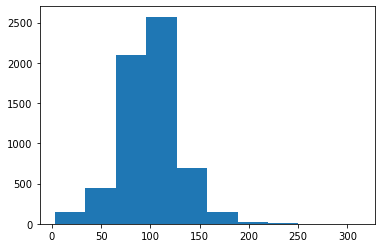

In [26]:
plt.hist(df.duracao)
plt.show()

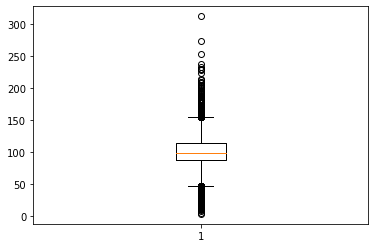

In [25]:
plt.boxplot(df.duracao)
plt.show()

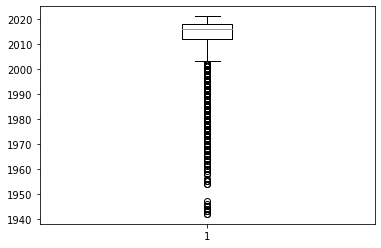

In [28]:
plt.boxplot(df.ano_lancamento)
plt.show()

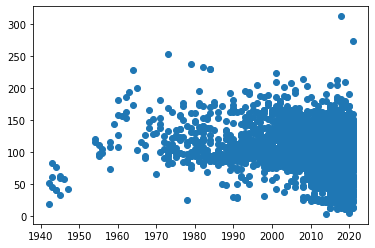

In [20]:
plt.scatter(df.ano_lancamento, df.duracao)